# COGS 108 - EDA Checkpoint

# Names

- Lily Yu
- Sophia Alonso
- Kelly Tran
- Yining Wang

<a id='research_question'></a>
# Research Question

How has remote learning during the COVID-19 pandemic affected San Diego/UCSD students’ grades and learning experience?

# Setup

In [55]:
## YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
capes = pd.read_csv("CAPES_data.csv")
capes.head()

,Instructor,Course,Term,Enroll,Evals Made,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received
0,"Jones, Ian William Nasser",ANAR 120 - Documenting Climate Change (A),FA20,15,4,100.0%,100.0%,2.50,B+ (3.50),NaN
1,"Smith, Neil Gordon",ANAR 121 - Cyber-Archaeology (A),FA20,17,6,100.0%,100.0%,6.50,A (4.00),NaN
2,"D'Alpoim Guedes, Jade A",ANAR 146 - Feeding the World (A),FA20,41,16,100.0%,100.0%,4.00,A- (3.81),A- (3.79)
3,"Fox, Patrick Keolu Ozer",ANBI 118 - Technology on the Go (A),FA20,20,15,93.3%,100.0%,2.77,B+ (3.67),A- (3.77)
4,"Fox, Patrick Keolu Ozer",ANBI 121 - Polynesian Navigation (A),FA20,14,10,100.0%,100.0%,2.72,B+ (3.67),NaN


# Data Cleaning

Describe your data cleaning steps here.

In [50]:
#TODO: Investigate columns dropped more
capes.dropna(inplace = True)

def standardize_grades(text):
#Handle if function has already been run
   
    if type(text) == float:
        return text
  
   #Keep all text after last parentheses open
    grade = text.split("(")[-1]
  
   #Cut off trailing parentheses close
    grade = grade.replace(")", "")
  
   #Convert to float
    grade = float(grade)
  
    return grade

#Convert both grade columns to floats
capes["Avg Grade Expected"] = capes["Avg Grade Expected"].apply(standardize_grades)
capes["Avg Grade Received"] = capes["Avg Grade Received"].apply(standardize_grades)

#capes["Avg Grade Received"].unique()

#capes["Rcmnd Class"].unique()

def standardize_recommendations(text):
#Handle if function has already been run
   if type(text) == float:
        return text
  
   pct = text.replace("%", "")
  
   pct = float(pct)
  
   return pct

def extract_term(text):
    TERMS = { "WI": 1, "SP": 2, "S1": 3, "S2": 4, "S3": 5, "FA": 6}
  
    term = text[:2]
    term = TERMS[term]
  
    return term

def extract_year(text):
  
    year = text[2:]
    year = int("20" + year)
  
    return year
#Convert both recommend percent columns to floats
capes["Rcmnd Class"] = capes["Rcmnd Class"].apply(standardize_recommendations)
capes["Rcmnd Instr"] = capes["Rcmnd Instr"].apply(standardize_recommendations)
capes['Term_num'] = capes['Term'].apply(extract_term)
capes['Year'] = capes['Term'].apply(extract_year)

# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

In [25]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
 
scores = pd.read_csv("SAT_PSAT.csv")
scores.head()

,Test,Year,Percentile,Total,ERW,Math,Reading,Writing and Language,Math.1,History/Social Studies,Science
0,SAT,2020,75th,1200,600,600,30,30,30.0,30,30
1,SAT,2020,50th,1030,520,520,26,26,26.0,26,26
2,SAT,2020,25th,880,440,430,22,22,21.5,23,22
3,SAT,2019,75th,1210,610,610,29,31,30.5,30,31
4,SAT,2019,50th,1050,530,520,25,26,26.0,27,27


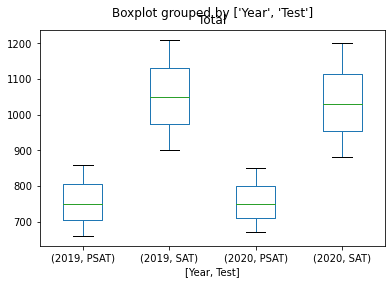

In [24]:
#Boxplot for PSAT/SAT scores for all years
scores.boxplot(by = ["Year", "Test"], column = ["Total"], grid = False)


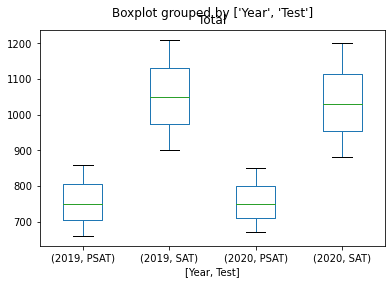

In [19]:
#Boxplot for specific categories of PSAT/SAT exams
scores.boxplot(by = ["Year", "Test"], column = ["ERW"], grid = False) 
scores.boxplot(by = ["Year", "Test"], column = ["Math"], grid = False) 
 

<bound method Series.mean of 2        3.79
3        3.77
5        2.99
6        3.87
9        3.91
         ... 
49055    3.46
49059    3.45
49060    3.33
49062    3.40
49063    3.45
Name: Avg Grade Received, Length: 904, dtype: float64>


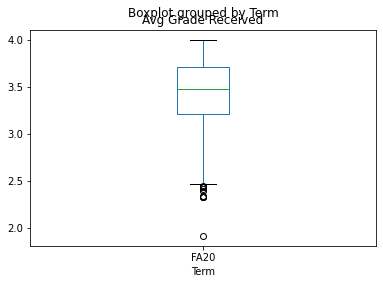

In [23]:
#Boxplot for FA20 avg grades#Mean of FA20 avg grades
FA20_data = capes[capes["Term"].str.contains("FA20")]
FA20_mean = FA20_data["Avg Grade Received"].mean
print(FA20_mean)
FA20_data.boxplot(by = "Term", column = ["Avg Grade Received"], grid = False)

<bound method Series.mean of 2        3.79
3        3.77
5        2.99
6        3.87
9        3.91
         ... 
49055    3.46
49059    3.45
49060    3.33
49062    3.40
49063    3.45
Name: Avg Grade Received, Length: 904, dtype: float64>


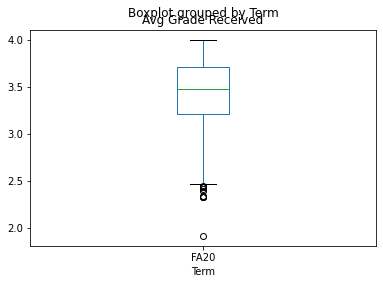

In [17]:
#Boxplot for S220 avg grades
#Mean of S220 avg grades
S220_data = capes[capes["Term"].str.contains("S220")]
S220_mean = S220_data["Avg Grade Received"].mean
print(S220_mean)
S220_data.boxplot(by = "Term", column = ["Avg Grade Received"], grid = False)

<bound method Series.mean of 39       3.78
40       3.83
43       3.38
44       3.36
45       3.76
         ... 
47445    3.73
47446    3.99
47447    3.67
47448    3.70
47449    3.74
Name: Avg Grade Received, Length: 243, dtype: float64>


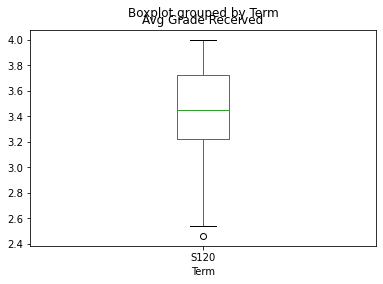

In [22]:
#Boxplot for S120 avg grades#Mean of S120 avg grades
S120_data = capes[capes["Term"].str.contains("S120")]
S120_mean = S120_data["Avg Grade Received"].mean
print(S120_mean)
S120_data.boxplot(by = "Term", column = ["Avg Grade Received"], grid = False)

<bound method Series.mean of 49       3.78
50       3.91
54       3.68
55       3.87
56       3.84
         ... 
47494    3.35
49077    4.00
49078    4.00
49081    3.64
49082    3.49
Name: Avg Grade Received, Length: 887, dtype: float64>


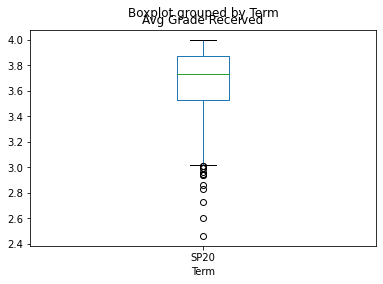

In [21]:
#Boxplot for SP20 avg grades#Mean of SP20 avg grades
SP20_data = capes[capes["Term"].str.contains("SP20")]
SP20_mean = SP20_data["Avg Grade Received"].mean
print(SP20_mean)
SP20_data.boxplot(by = "Term", column = ["Avg Grade Received"], grid = False)

<bound method Series.mean of 49       3.78
50       3.91
54       3.68
55       3.87
56       3.84
         ... 
47494    3.35
49077    4.00
49078    4.00
49081    3.64
49082    3.49
Name: Avg Grade Received, Length: 887, dtype: float64>


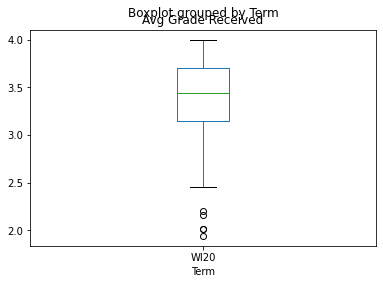

In [20]:
#Boxplot for WI20 avg grades#Mean of WI20 avg grades
WI20_data = capes[capes["Term"].str.contains("WI20")]
WI20_mean = WI20_data["Avg Grade Received"].mean
print(WI20_mean)
WI20_data.boxplot(by = "Term", column = ["Avg Grade Received"], grid = False)

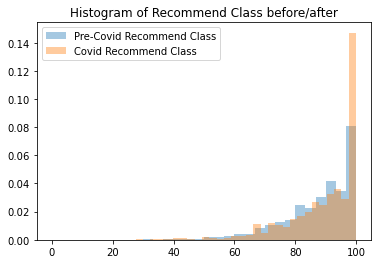

In [56]:
pre_covid_rcmnd_class = capes[capes['Year'] < 2020]['Rcmnd Class']
pre_covid_rcmnd_class = pre_covid_rcmnd_class.append(capes[(capes['Year'] == 2020) & (capes['Term_num'] <= 2)]['Rcmnd Class'])
covid_rcmnd_class = capes[(capes['Year'] == 2020) & (capes['Term_num'] > 2)]['Rcmnd Class']
plt.hist(pre_covid_rcmnd_class, alpha = 0.4, label = "Pre-Covid Recommend Class", density = True, bins = 30)
plt.hist(covid_rcmnd_class, alpha = 0.4, label = "Covid Recommend Class", density = True, bins = 30)
plt.title("Histogram of Recommend Class before/after")
plt.legend()

             